# Predict suitable loaction to start a new cuisine restaurant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #importing matplot lib library
%matplotlib inline

pd.set_option('display.max_column',40)

df=pd.read_csv('zomato.csv',engine='python')
pd.set_option('display.max_columns',25)
print('Shape:',df.shape)
df.head()

Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

### Take only India (Country Code 1) and discard any other country in the dataframe.

<BarContainer object of 43 artists>

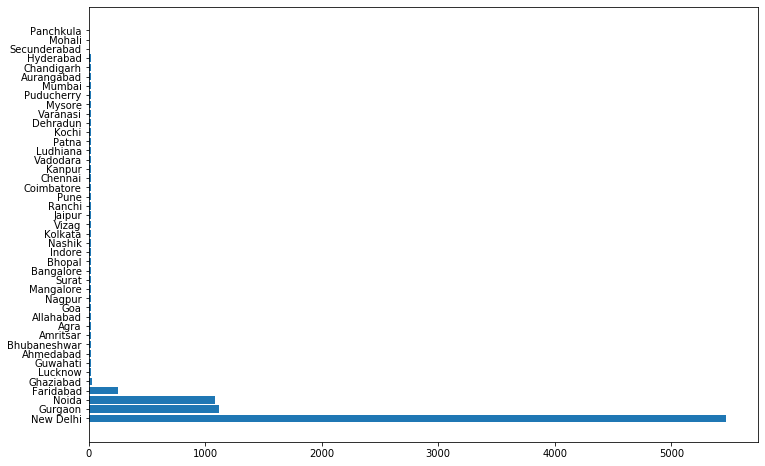

In [3]:
india=df[df['Country Code'] == 1]
cities=india['City'].value_counts()
city=cities.index.tolist()
count=cities.values.tolist()

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.barh(city,count)

## Clearly it is advisable to open a new restaurant in 'Gurgaon'

### Let's further shorten the dataset by taking Gurgaon city.

In [4]:
ggn=india[india['City'] == 'Gurgaon']
print(ggn.shape)
ggn.head()

(1118, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1161,18396451,K Lab,1,Gurgaon,"Shop GF-18, ILD Trade Centre, Sector 47, Near ...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039310,28.424831,"Cafe, Beverages",350,Indian Rupees(Rs.),No,No,No,No,1,3.4,Orange,Average,16
1162,18237941,Pind Balluchi,1,Gurgaon,"112/112-A, 1st Floor, ILD Trade Centre, Near S...","ILD Trade Centre Mall, Sohna Road","ILD Trade Centre Mall, Sohna Road, Gurgaon",77.039220,28.424913,"North Indian, Mughlai",800,Indian Rupees(Rs.),Yes,Yes,No,No,2,2.7,Orange,Average,80
1163,2787,Punjab Grill,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.3,Green,Very Good,1887
1164,3431,Zambar,1,Gurgaon,"3rd Floor, Ambience Mall, Gurgaon","Ambience Mall, Gurgaon","Ambience Mall, Gurgaon, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,802
1165,303699,Cakes & More,1,Gurgaon,"27, Ground Floor, Ansal Plaza Mall, Palam Viha...","Ansal Plaza Mall, Palam Vihar","Ansal Plaza Mall, Palam Vihar, Gurgaon",77.042009,28.511416,Bakery,250,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4


### Let's see top 30 crowded `Localities`

<BarContainer object of 30 artists>

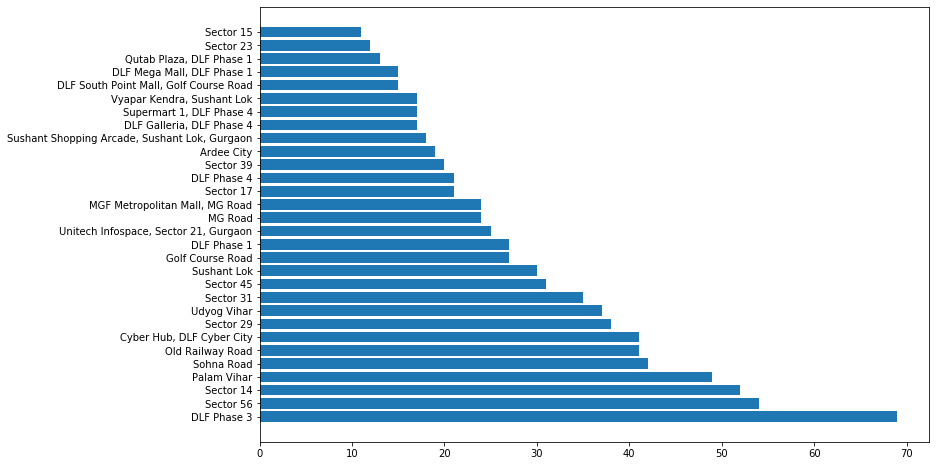

In [5]:
top30locs=ggn['Locality'].value_counts()[:30]
area=top30locs.index.tolist()
count=top30locs.values.tolist()

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.barh(area,count)

## OBSERVATION : DLF Phase 3 is most crowded locality followed by Sector 56 & Sector 14

### So it's not advisable to start a new rerstaurant here.

### Dropping columns `Country Code`, `City`, `Address`, `Locality Verbose`

In [6]:
ggn=ggn.drop(['Country Code', 'City', 'Address', 'Locality Verbose'],axis=1)

In [7]:
temp=ggn.columns[7:-4]

for col in temp:
    print(col)
    print(ggn[col].value_counts())
    print('='*25)

Currency
Indian Rupees(Rs.)    1118
Name: Currency, dtype: int64
Has Table booking
No     914
Yes    204
Name: Has Table booking, dtype: int64
Has Online delivery
No     693
Yes    425
Name: Has Online delivery, dtype: int64
Is delivering now
No     1106
Yes      12
Name: Is delivering now, dtype: int64
Switch to order menu
No    1118
Name: Switch to order menu, dtype: int64
Price range
1    453
2    440
3    158
4     67
Name: Price range, dtype: int64


### Dropping columns `Currency`, `Is delivering now`, `Switch to order menu`

In [8]:
ggn=ggn.drop(['Currency', 'Is delivering now', 'Switch to order menu'],axis=1)

### Analyzing columns `Aggregate rating` , `Rating color` and `Rating text` .

In [9]:
rating={'Not rated':[],'Poor':[],'Average':[],'Good':[],'Very Good':[],'Excellent':[]}
for c,t in zip(ggn['Aggregate rating'],ggn['Rating text']):
    rating[t].append(c)

rating_c={'Not rated':[],'Poor':[],'Average':[],'Good':[],'Very Good':[],'Excellent':[]}
for c,t in zip(ggn['Rating color'],ggn['Rating text']):
    rating_c[t].append(c)
for t in rating:
    print(t,':',min(rating[t]),'-',max(rating[t]),':',*set(rating_c[t]))
    print('='*30)

Not rated : 0.0 - 0.0 : White
Poor : 2.0 - 2.4 : Red
Average : 2.5 - 3.4 : Orange
Good : 3.5 - 3.9 : Yellow
Very Good : 4.0 - 4.4 : Green
Excellent : 4.5 - 4.9 : Dark Green


### So basically these columns are same, therefore removing `Aggregate rating` and `Rating color`

In [10]:
ggn=ggn.drop(['Aggregate rating','Rating color'],axis=1)
ggn.head()

,Restaurant ID,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating text,Votes
1161,18396451,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",350,No,No,1,Average,16
1162,18237941,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",800,Yes,Yes,2,Average,80
1163,2787,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",2000,Yes,Yes,4,Very Good,1887
1164,3431,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",1400,Yes,Yes,3,Very Good,802
1165,303699,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,250,No,No,1,Average,4


### Analyzing columns `Average Cost for two` and `Price range`

In [11]:
rating={1:[],2:[],3:[],4:[]}
for c,t in zip(ggn['Average Cost for two'],ggn['Price range']):
    rating[t].append(c)
    
for t in rating:
    print(t,':',min(rating[t]),'-',max(rating[t]))
    print('='*20)

1 : 100 - 450
2 : 500 - 950
3 : 1000 - 1900
4 : 2000 - 5000


In [12]:
# dropping columns `Average Cost for two`

ggn=ggn.drop(['Average Cost for two'],axis=1)
ggn.head()

,Restaurant ID,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Price range,Rating text,Votes
1161,18396451,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",No,No,1,Average,16
1162,18237941,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",Yes,Yes,2,Average,80
1163,2787,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",Yes,Yes,4,Very Good,1887
1164,3431,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",Yes,Yes,3,Very Good,802
1165,303699,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,No,No,1,Average,4


### Check for any missing (or invalid) coordinates

In [13]:
count=0
for lat, lng,name in zip(ggn['Latitude'], ggn['Longitude'],ggn['Restaurant Name']):
    if(lat == 0 or lng == 0):
        count+=1

print("{} restaurants have missing coordinates. Let's get rid of them".format(count))

48 restaurants have missing coordinates. Let's get rid of them


In [14]:
ggn=ggn[(ggn['Latitude']!=0) & (ggn['Longitude']!=0)]
print('Shape:',ggn.shape)
ggn.reset_index(drop=True,inplace=True) # reset index
ggn.head()

Shape: (1070, 11)


,Restaurant ID,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Has Table booking,Has Online delivery,Price range,Rating text,Votes
0,18396451,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,"Cafe, Beverages",No,No,1,Average,16
1,18237941,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,"North Indian, Mughlai",Yes,Yes,2,Average,80
2,2787,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,"North Indian, Mughlai",Yes,Yes,4,Very Good,1887
3,3431,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,"South Indian, Seafood, Kerala",Yes,Yes,3,Very Good,802
4,303699,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,Bakery,No,No,1,Average,4


### Now separate the cuisines in the dataset

In [15]:
ggnWithCuisines = ggn.copy()

for index, row in ggn.iterrows():
    for cuisine in row['Cuisines'].split(', '):
        ggnWithCuisines.at[index, cuisine] = 1
        
ggnWithCuisines = ggnWithCuisines.fillna(0)
ggnWithCuisines.drop(['Cuisines'], axis=1, inplace=True)
ggnWithCuisines.head()

,Restaurant ID,Restaurant Name,Locality,Longitude,Latitude,Has Table booking,Has Online delivery,Price range,Rating text,Votes,Cafe,Beverages,...,Rajasthani,Tex-Mex,North Eastern,Oriya,Chettinad,Bihari,Afghani,Middle Eastern,Indonesian,Goan,Charcoal Grill,Assamese
0,18396451,K Lab,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,No,No,1,Average,16,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18237941,Pind Balluchi,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,Yes,Yes,2,Average,80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2787,Punjab Grill,"Ambience Mall, Gurgaon",77.097118,28.503077,Yes,Yes,4,Very Good,1887,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3431,Zambar,"Ambience Mall, Gurgaon",77.097185,28.502613,Yes,Yes,3,Very Good,802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,303699,Cakes & More,"Ansal Plaza Mall, Palam Vihar",77.042009,28.511416,No,No,1,Average,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now let's find Top 30 cuisines

<BarContainer object of 30 artists>

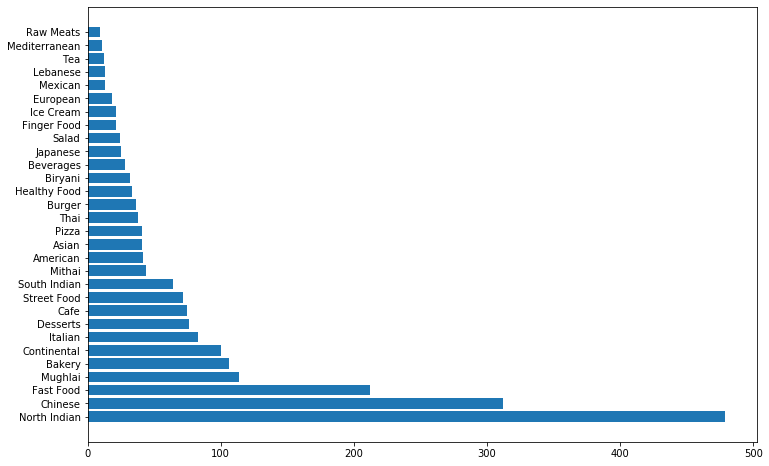

In [16]:
ggnWithCuisinesonly=ggnWithCuisines.drop(list(ggnWithCuisines.columns[:10]), axis=1)
temp=ggnWithCuisinesonly.sum(axis=0).sort_values(ascending=False)[:30]

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
ax.barh(temp.index.tolist(),temp.values.tolist())

In [17]:
import folium

map_ggn = folium.Map(location=(28.4595, 77.0266), zoom_start=12)

for lat, lon, name, north in zip(ggnWithCuisines['Latitude'], ggnWithCuisines['Longitude'], ggnWithCuisines['Restaurant Name'], ggnWithCuisines['North Indian']):
    if north==1.0:
        color='#ff0000'
    else:
        color='#0000ff'
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7).add_to(map_ggn)
        
map_ggn

## OBSERVATION : North Indian is most sold cuisine followed by Chinese & Fast Food

### Keep only these 30 cuisines in the dataset & drop the others.

In [18]:
array=list(ggnWithCuisinesonly.columns)
for i in array:
    if i not in temp.index:
        ggnWithCuisinesonly.drop([i],axis=1,inplace=True)
        
ggnWithCuisinesonly['Locality']=ggnWithCuisines['Locality']
ggnWithCuisinesonly.head()

,Cafe,Beverages,North Indian,Mughlai,South Indian,Bakery,Ice Cream,Chinese,Fast Food,Japanese,Thai,Pizza,...,Lebanese,American,Salad,Healthy Food,Tea,Asian,Finger Food,Mediterranean,European,Mexican,Burger,Locality
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"ILD Trade Centre Mall, Sohna Road"
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"ILD Trade Centre Mall, Sohna Road"
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ambience Mall, Gurgaon"
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ambience Mall, Gurgaon"
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ansal Plaza Mall, Palam Vihar"


### Aggregate the dataframe on `Locality`

In [19]:
ggn_grouping=ggnWithCuisinesonly.groupby('Locality').sum()

for i in ggn_grouping.index:
    if i not in top30locs:
        ggn_grouping.drop(i,axis=0,inplace=True)
        
ggn_grouping.head()

,Cafe,Beverages,North Indian,Mughlai,South Indian,Bakery,Ice Cream,Chinese,Fast Food,Japanese,Thai,Pizza,...,Italian,Lebanese,American,Salad,Healthy Food,Tea,Asian,Finger Food,Mediterranean,European,Mexican,Burger
Locality,,,,,,,,,,,,,,,,,,,,,,,,,
Ardee City,1.0,0.0,9.0,1.0,3.0,0.0,0.0,7.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Cyber Hub, DLF Cyber City",7.0,1.0,11.0,1.0,0.0,3.0,1.0,4.0,5.0,2.0,2.0,3.0,...,10.0,1.0,7.0,1.0,1.0,1.0,4.0,0.0,3.0,3.0,3.0,2.0
"DLF Galleria, DLF Phase 4",1.0,1.0,6.0,2.0,0.0,2.0,0.0,3.0,8.0,0.0,0.0,1.0,...,2.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
"DLF Mega Mall, DLF Phase 1",2.0,1.0,3.0,0.0,0.0,2.0,1.0,2.0,6.0,1.0,2.0,2.0,...,3.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
DLF Phase 1,1.0,1.0,6.0,5.0,0.0,3.0,0.0,7.0,8.0,2.0,2.0,1.0,...,1.0,0.0,2.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0


### Find Top 10 common cuisines on each `Locality`.

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = []
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Cuisine'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Cuisine'.format(ind+1))

ggn_already = pd.DataFrame(columns=columns)

for i in top30locs.index:
    ggn_already.loc[i]=ggn_grouping.loc[i].sort_values(ascending=False)[:10].index
    
ggn_already

,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine,8th Most Common Cuisine,9th Most Common Cuisine,10th Most Common Cuisine
DLF Phase 3,North Indian,Chinese,Fast Food,Mughlai,Bakery,South Indian,Street Food,Beverages,Continental,Healthy Food
Sector 56,North Indian,Chinese,Fast Food,Desserts,Mughlai,Bakery,Street Food,South Indian,Ice Cream,Burger
Sector 14,North Indian,Chinese,South Indian,Fast Food,Bakery,Mughlai,Street Food,Continental,Desserts,Burger
Palam Vihar,North Indian,Chinese,Fast Food,Street Food,Bakery,Mithai,Mughlai,Desserts,South Indian,Ice Cream
Sohna Road,North Indian,Chinese,Fast Food,Cafe,Bakery,Italian,Desserts,Continental,Mughlai,South Indian
Old Railway Road,North Indian,Chinese,Fast Food,Mughlai,Bakery,Street Food,South Indian,Mithai,Desserts,Beverages
"Cyber Hub, DLF Cyber City",North Indian,Italian,Cafe,American,Continental,Desserts,Fast Food,Asian,Chinese,European
Sector 29,North Indian,Chinese,Continental,Asian,Italian,Mughlai,Fast Food,American,Thai,European
Udyog Vihar,North Indian,Chinese,Cafe,Fast Food,Desserts,South Indian,Bakery,Mughlai,Continental,Biryani
Sector 31,North Indian,Fast Food,Chinese,Bakery,Mughlai,Street Food,Beverages,Desserts,Italian,Biryani


## OBSERVATIONS :

### `Cafe` can be opened in 'Palam Vihar'
### `Chinese Restaurant` in 'Cyber Hub'
### `Pizza Store` on 'Sohna Road' 
### `Street Food` at 'Old Railway Road'
### `Fast Food Centre` in 'Sector 29'